In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../data/raw_data/gspc.csv', index_col='date')
df.index = pd.to_datetime(df.index)

In [4]:
print(df.head(5))
print(df.info())

                        close               high                low  \
date                                                                  
NaT                     ^GSPC              ^GSPC              ^GSPC   
2020-01-02   3257.85009765625  3258.139892578125  3235.530029296875   
2020-01-03   3234.85009765625   3246.14990234375  3222.340087890625   
2020-01-06  3246.280029296875  3246.840087890625  3214.639892578125   
2020-01-07  3237.179931640625  3244.909912109375  3232.429931640625   

                         open      volume  
date                                       
NaT                     ^GSPC       ^GSPC  
2020-01-02     3244.669921875  3459930000  
2020-01-03  3226.360107421875  3484700000  
2020-01-06  3217.550048828125  3702460000  
2020-01-07  3241.860107421875  3435910000  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, NaT to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   

In [5]:
print(f'Duplicates in the data: {df.duplicated().sum()}')
print(f'Missing values in the data: {df.isnull().sum()}')

Duplicates in the data: 0
Missing values in the data: close     0
high      0
low       0
open      0
volume    0
dtype: int64


In [10]:
df = df.drop(df.index[0])

In [12]:
df = df.astype(float)

In [ ]:
n = len(df)
print(f'Len data: {n}')
bins = int(np.sqrt(n))
print(f'Bins: {bins}')

Len data: 1258
Bins: 35


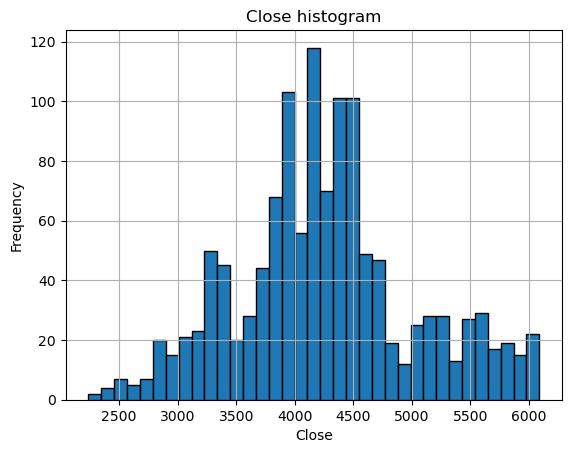

In [19]:
df['close'].hist(bins=bins, edgecolor='black')
plt.title('Close histogram')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.show()

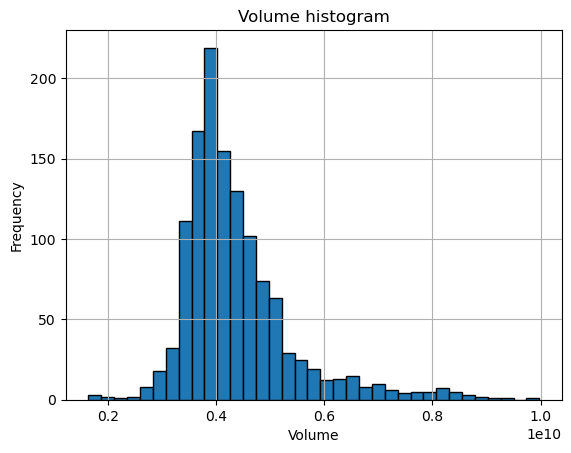

In [20]:
df['volume'].hist(bins=bins, edgecolor='black')
plt.title('Volume histogram')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

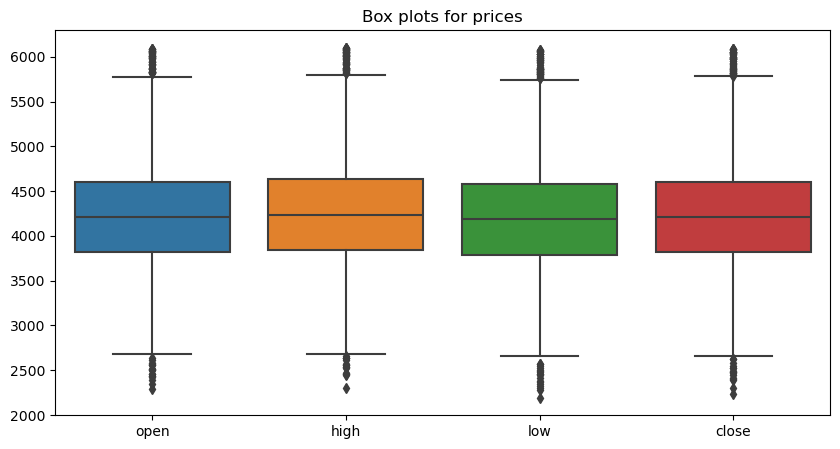

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['open', 'high', 'low', 'close']])
plt.title('Box plots for prices')
plt.show()

c:\Users\santi\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


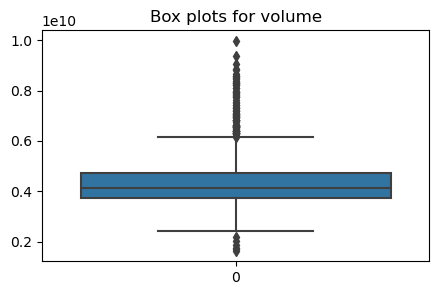

In [30]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df['volume'])
plt.title('Box plots for volume')
plt.show()

In [28]:
df['sma_50'] = df['close'].rolling(window=50).mean()
df['sma_200'] = df['close'].rolling(window=200).mean()

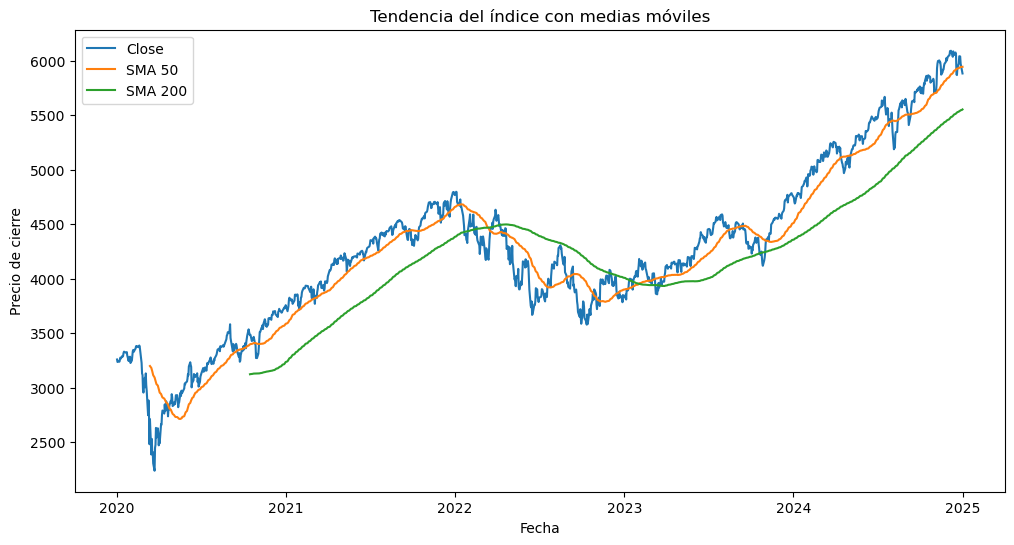

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close')
plt.plot(df['sma_50'], label='SMA 50')
plt.plot(df['sma_200'], label='SMA 200')
plt.title('Trends in S&P 500')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()